# Creación de una red de spines de dimensión $N\times M$
- Importamos la librería numpy y numba para acelerar el código.
- Definimos la función que contendrá a los spines ordenados de forma aleatoria.
    - Esta función generará un arreglo con los números $1$ y $-1$ distribuidos aleatoriamente.
- Generamos el arreglo.

In [1]:
import numpy as np
from numba import jit

def arreglo_spines(N, M):
    return np.random.choice([-1, 1], size=(N, M))

arreglo_spines(7, 7)

array([[-1, -1, -1, -1, -1,  1,  1],
       [-1, -1,  1,  1, -1,  1, -1],
       [ 1,  1, -1, -1, -1, -1, -1],
       [ 1,  1, -1,  1, -1,  1, -1],
       [-1,  1, -1, -1,  1, -1,  1],
       [ 1,  1,  1,  1, -1, -1,  1],
       [-1,  1,  1, -1, -1,  1, -1]])

# Formación de imagen
- Importamos PIL que es una librería de procesamiento de imágenes.
- Definimos la función que convertirá el arreglo en una imagen.
- Ingresamos el tamaño del arreglo y graficamos la distribución de spines.

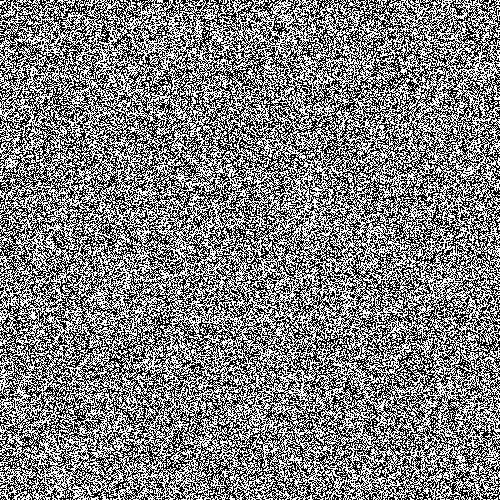

In [2]:
from PIL import Image

def imagen_arreglo(spines):
    return Image.fromarray(np.uint8((spines + 1) * 0.5 * 255))  
    #El comando Image.fromarray espera números entre 0 y 255,
    # así que convertimos a números
    #spines contiene los números -1 y +1, sumamos 1 y tenemos 0 y 2, 
    # multiplicamos por 0.5 y tenemos 0 y 1, multiplicamos por 255 
    # para estar dentro de los valores que acepta Image.fromarray
    #np.unit8() convierte a un entero de 8 bits

#Ingresamos las dimensiones del arreglo,
#  se produce el arreglo y se grafica la distribución.
imagen_arreglo(arreglo_spines(500, 500))   

# Inicio de iteraciones
- Definimos la función pasos_montecarlo que requiere ingresar el tamaño del arreglo y $\beta$

In [3]:
@jit(nopython=True)
def pasos_montecarlo(spines, beta=0.4):
    N, M = spines.shape     #Guarda las dimensiones del arreglo en N y M
    for n_offset in range(2):
        for m_offset in range(2):
            for n in range(n_offset, N, 2):
                for m in range(m_offset, M, 2):
                    actualizacion_mc(spines, n, m, beta)
    return spines
@jit(nopython=True)
def actualizacion_mc(spines, n, m, beta):
    total = 0
    N, M = spines.shape
    for i in range(n-1, n+2):
        for j in range(m-1, m+2):
            if i == n and j == m:
                continue
            total += spines[i % N, j % M]
    dE = 2 * spines[n, m] * total   
    #La diferencia de energías está determinada de esta manera
    if dE <= 0: 
        # Si la diferencia es negativa, aceptamos la congifuración y se contnúa
        spines[n, m] *= -1
    elif np.exp(-dE * beta) > np.random.rand(): 
        #Si la diferencia no es negativa, entonces elegimo
        spines[n, m] *= -1

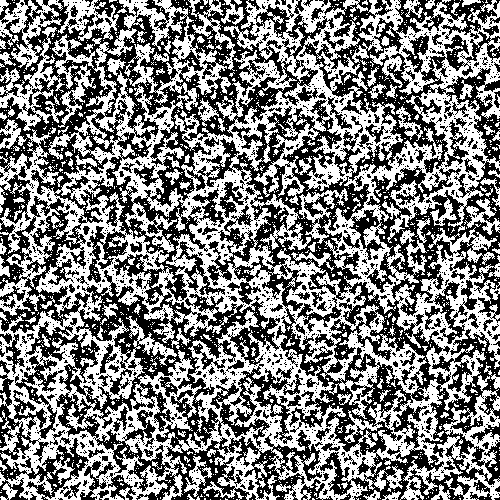

In [4]:
imagen_arreglo(pasos_montecarlo(arreglo_spines(500, 500)))

# Figura interactiva

In [5]:
from ipywidgets import interact
def display_ising_sequence(images):
    def _show(frame=(0, len(images) - 1)):
        return imagen_arreglo(images[frame])
    return interact(_show)

In [7]:
#Formación de imagen

images = [arreglo_spines(500, 500)]


for i in range(50):
    images.append(pasos_montecarlo(images[-1].copy()))
display_ising_sequence(images)

interactive(children=(IntSlider(value=25, description='frame', max=50), Output()), _dom_classes=('widget-inter…

<function __main__.display_ising_sequence.<locals>._show(frame=(0, 50))>